In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv
/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data/A_Z Handwritten Data.csv


In [75]:
data = pd.read_csv("/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv")

In [76]:
# df= pd.read_csv("/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data/A_Z Handwritten Data.csv")

In [5]:
df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
data.shape

(372450, 785)

In [78]:
data.columns

Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       ...
       '0.639', '0.640', '0.641', '0.642', '0.643', '0.644', '0.645', '0.646',
       '0.647', '0.648'],
      dtype='object', length=785)

In [79]:
df['0.1'].value_counts()

0.1
0    372450
Name: count, dtype: int64

In [50]:
data.sample(1)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
270068,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
import seaborn as sb

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='0.7', ylabel='Count'>

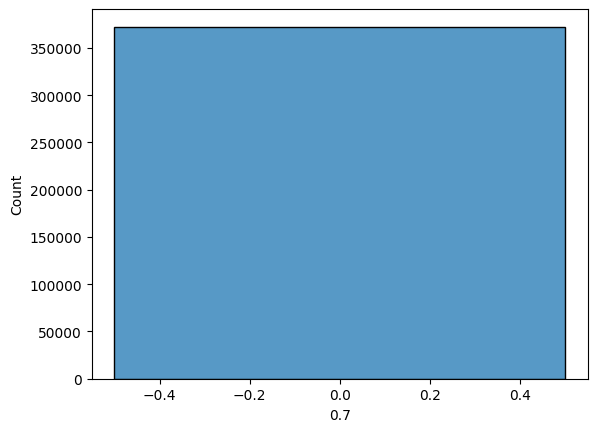

In [82]:
sb.histplot(data['0.7'])

In [83]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [84]:
X = data.drop(['0'], axis = 1)

In [85]:
y = data['0'] 

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
y_train

20675      1
234698    18
21507      1
270540    18
248793    18
          ..
259178    18
365838    24
131932    13
146867    14
121958    13
Name: 0, Length: 297960, dtype: int64

In [88]:
X_train.shape

(297960, 784)

In [111]:
# Assuming X_train is your dataset with shape (num_samples, 784)
# Reshape X_train into a 3D array where each image is represented as a 28x28 matrix
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 28, 28))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 28, 28))

# Now X_train_reshaped is a 3D array with shape (num_samples, 28, 28)

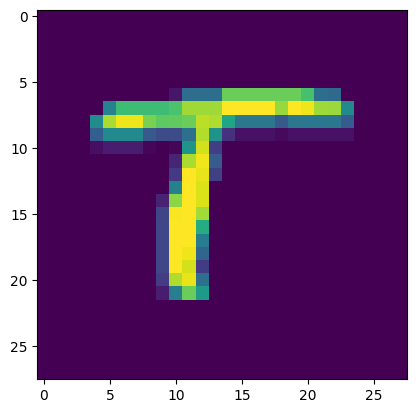

In [90]:
plt.imshow(X_train_reshaped[56])
plt.show()


In [112]:
X_train_reshaped = X_train_reshaped/255
X_test_reshaped = X_test_reshaped/255

In [92]:
X_train_reshaped

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [93]:
import tensorflow as tf
from tensorflow import keras

In [94]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten 

In [106]:
len(y_train.unique())#.sum()

26

In [107]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [108]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,834 (405.60 KB)

 Trainable params: 103,834 (405.60 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

In [110]:
model.fit(X_train_reshaped, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.5196 - val_loss: 0.1734
Epoch 2/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.1470 - val_loss: 0.1324
Epoch 3/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.1077 - val_loss: 0.1106
Epoch 4/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.0871 - val_loss: 0.1071
Epoch 5/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0761 - val_loss: 0.0939
Epoch 6/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.0655 - val_loss: 0.0953
Epoch 7/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0591 - val_loss: 0.0970
Epoch 8/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0518 - val_loss: 0.0946
Epoch 9/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.0481 - val_loss: 0.0928
Epoch 10/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.0441 - val_loss: 0.0882


In [113]:
y_prob = model.predict(X_test_reshaped)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [114]:
y_prob

array([[2.6644948e-15, 2.3239960e-15, 5.1978559e-23, ..., 7.2046487e-13,
        8.4846748e-11, 2.2318147e-21],
       [8.7898946e-38, 1.5207689e-11, 1.3809015e-19, ..., 1.7804939e-19,
        2.6643301e-17, 1.8316624e-16],
       [6.1740926e-26, 2.5642122e-09, 9.9896455e-01, ..., 5.3545374e-18,
        2.9903502e-14, 1.3135221e-08],
       ...,
       [3.7370743e-17, 1.2279530e-12, 3.0017273e-11, ..., 1.4947787e-10,
        6.1947702e-08, 5.8369228e-08],
       [5.2499771e-12, 4.0560219e-17, 3.9154400e-18, ..., 1.6021314e-18,
        9.0268959e-19, 3.4399015e-23],
       [7.2677685e-20, 1.3425543e-09, 4.9378167e-16, ..., 1.5318050e-19,
        3.7757049e-14, 1.0819658e-18]], dtype=float32)

In [116]:
y_pred =y_prob.argmax(axis=1)

In [117]:
from sklearn.metrics import accuracy_score

In [118]:
accuracy_score(y_test, y_pred)

0.9774063632702377

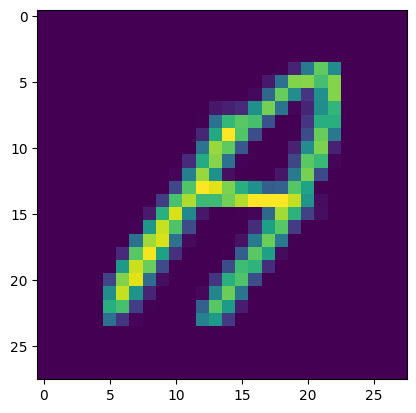

In [139]:
 plt.imshow(X_test_reshaped[4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
predicted :  [12]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
predicted :  [18]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
predicted :  [2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
predicted :  [14]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
predicted :  [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
predicted :  [11]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
predicted :  [14]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
predicted :  [2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
predicted :  [19]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
predicted :  [22]


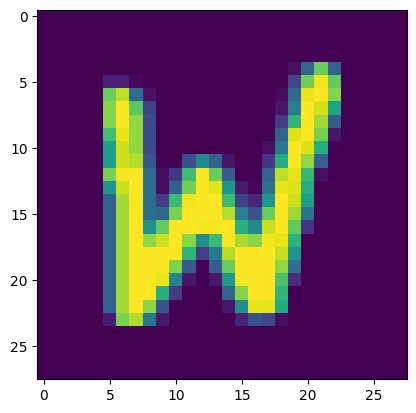

In [135]:
for i in range(0,10):
    p=model.predict(X_test_reshaped[i].reshape(1,28,28)).argmax(axis=1)
    print("predicted : ", p)
    

In [140]:
alpha_dict={
    '0':'A',
    '1':'B',
    '2':'C',
    '3' :'D',
    '4':'E',
    '5':'F',
    '6':'G',
    '7':'H',
    '8':'I',
    '9':'J',
    '10':'K',
    '11':'L',
    '12':'M',
    '13':'N',
    '14':'O',
    '15':'P',
    '16':'Q',
    '17':'R',
    '18':'S',
    '19':'T',
    '20':'U',
    '21':'V',
    '22':'W',
    '23':'X',
    '24':'Y',
    '25':'Z'
}

In [132]:
df[df['0']==13]

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
120801,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120802,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120803,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120804,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120805,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139806,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139807,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139808,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139809,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
